In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/animal'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal/Dataset/val/horse/pexels-photo-629139.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-23133963.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-11257742.jpeg
/kaggle/input/animal/Dataset/val/horse/horse-herd-fog-nature-525003.jpeg
/kaggle/input/animal/Dataset/val/horse/horse-portrait-head-halter-487853.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-2313396.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-634613.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-793235.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-282893.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-1996332.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-23133962.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-1090408.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-1125774.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-1524620.jpeg
/kaggle/input/animal/Dataset/val/horse/pexels-photo-635499.jpeg
/kaggl

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array  # Correct imports for image processing
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import (
    EfficientNetB3,
    ResNet50,
    DenseNet121,
    MobileNetV2,
    VGG16
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Scikit-learn Libraries for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
print("GPU Available:", tf.test.is_gpu_available())

GPU Available: True


 RESNET 50

In [4]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load ResNet50 pre-trained model
base_model = ResNet50(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.3493 - loss: 1.1971 - val_accuracy: 0.7143 - val_loss: 0.9423
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 635ms/step - accuracy: 0.3776 - loss: 1.1562 - val_accuracy: 0.1429 - val_loss: 1.1207
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 635ms/step - accuracy: 0.3680 - loss: 1.0995 - val_accuracy: 0.6905 - val_loss: 1.0057
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 634ms/step - accuracy: 0.3925 - loss: 1.0812 - val_accuracy: 0.7143 - val_loss: 0.9544
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 648ms/step - accuracy: 0.3971 - loss: 1.0928 - val_accuracy: 0.7143 - val_loss: 0.9292
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 612ms/step - accuracy: 0.4144 - loss: 1.0723 - val_accuracy: 0.7169 - val_loss: 0.9999
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 612ms/step -

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.7266 - loss: 0.9561
Test Accuracy: 69.83%
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step


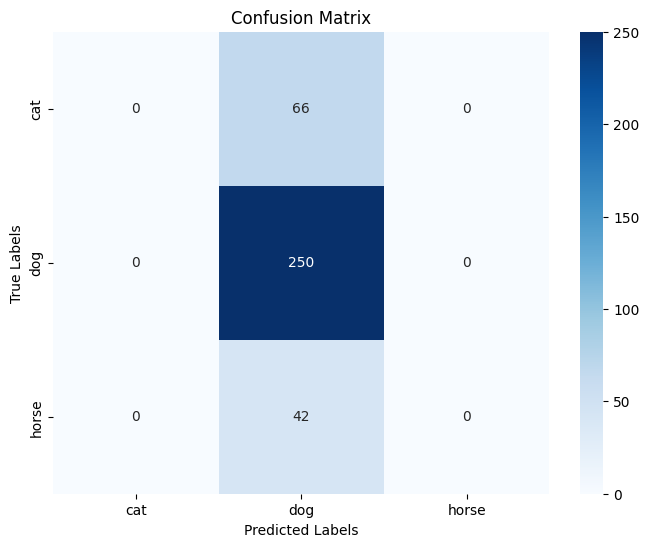

Classification Report:

              precision    recall  f1-score   support

         cat       0.00      0.00      0.00        66
         dog       0.70      1.00      0.82       250
       horse       0.00      0.00      0.00        42

    accuracy                           0.70       358
   macro avg       0.23      0.33      0.27       358
weighted avg       0.49      0.70      0.57       358

              precision    recall  f1-score     support
cat            0.000000  0.000000  0.000000   66.000000
dog            0.698324  1.000000  0.822368  250.000000
horse          0.000000  0.000000  0.000000   42.000000
accuracy       0.698324  0.698324  0.698324    0.698324
macro avg      0.232775  0.333333  0.274123  358.000000
weighted avg   0.487656  0.698324  0.574280  358.000000


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Dynamically extract class labels from the test data generator
class_labels = test_data.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())  # Invert for correct mapping

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(class_labels.values()),
            yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

# Optionally save the report to CSV
report_df.to_csv("classification_report.csv", index=True)


In [7]:
# Save the model
model.save("animal_classification_resnet50_fixed.h5")
print("Model saved as 'animal_classification_resnet50_fixed.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_resnet50_fixed.h5")
print("Model loaded successfully!")
#loaded_model.summary()

Model saved as 'animal_classification_resnet50_fixed.h5'
Model loaded successfully!


In [14]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Select a specific image file from the directory
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Directory containing horse images

# Check if the directory exists and contains images
if os.path.exists(img_directory) and len(os.listdir(img_directory)) > 0:
    img_file = os.listdir(img_directory)[0]  # Take the first image file
    img_path = os.path.join(img_directory, img_file)  # Full path to the image file
    print(f"Selected image: {img_path}")
else:
    raise FileNotFoundError(f"No images found in {img_directory}")

# Predict on the selected image
def predict_image(model, img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    predictions = model.predict(img_array)  # Get predictions
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get predicted class index
    confidence = np.max(predictions)  # Get confidence score
    
    return predicted_class, confidence

# Make the prediction
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")


Selected image: /kaggle/input/animal/Dataset/test/horse/pexels-photo-629139.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: dog
Confidence: 40.73%


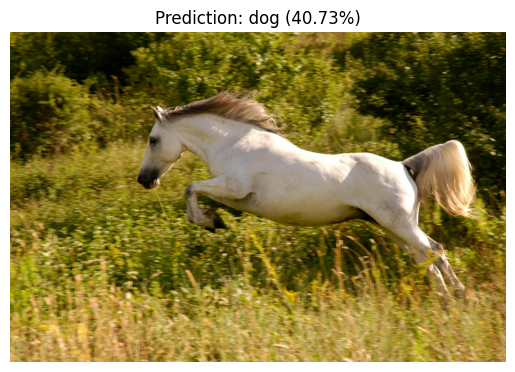

In [17]:
plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence * 100:.2f}%)")
plt.axis('off')
plt.show()


Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 838ms/step - accuracy: 0.3411 - loss: 1.4631 - val_accuracy: 0.1799 - val_loss: 1.0665 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 644ms/step - accuracy: 0.3501 - loss: 1.2679 - val_accuracy: 0.7143 - val_loss: 0.9707 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 640ms/step - accuracy: 0.3365 - loss: 1.2657 - val_accuracy: 0.1720 - val_loss: 1.0941 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 626ms/step - accuracy: 0.3520 - loss: 1.2521 - val_accuracy: 0.3016 - val_loss: 1.0722 - learning_rate: 0.0010
Epoch 5/10
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.3736 - loss: 1.2408
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 623ms/step - accuracy: 0.3730 - loss: 1.2409 - val_accuracy: 0.5767 - v

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,373 (90.98 MB)

 Trainable params: 4,728,323 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


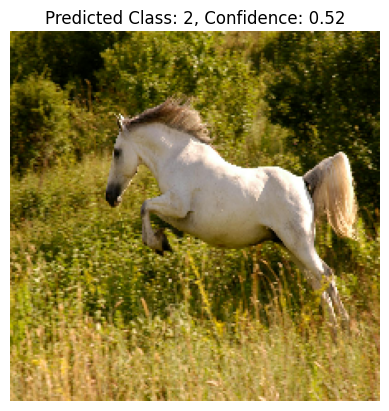

Predicted Class: horse
Confidence: 51.54%


Text(0.5, 1.0, 'Training and Validation Accuracy')

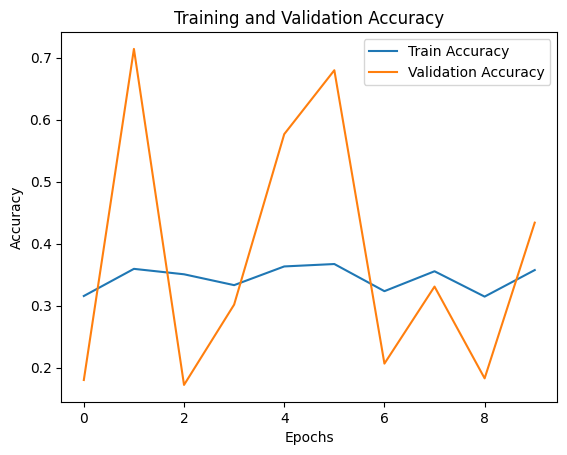

In [18]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load ResNet50 pre-trained model
base_model = ResNet50(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Freeze all but the last 10 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save("animal_classification_resnet50_final.h5")
print("Model saved as 'animal_classification_resnet50_final.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_resnet50_final.h5")
print("Model loaded successfully!")
loaded_model.summary()

# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence


# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")


In [1]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Specify the image file directly (path to the image file)
img_path = "/kaggle/input/animal/Dataset/test/cat/cat-2068462_640.jpg"

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

NameError: name 'train_data' is not defined

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generator and load training data
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary


Found 1027 images belonging to 3 classes.


In [8]:
test_data = test_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

class_labels = test_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}


NameError: name 'test_datagen' is not defined

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0,1]

# Define target size (same as model input size)
IMG_HEIGHT = 224  # Example height
IMG_WIDTH = 224   # Example width

# Load test data
test_data = test_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

# Get class labels from test data
class_labels = test_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary


Found 358 images belonging to 3 classes.


In [5]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Specify the image file directly (path to the image file)
img_path = "/kaggle/input/animal/Dataset/test/cat/cat-2068462_640.jpg"

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

NameError: name 'predict_image' is not defined

In [11]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

NameError: name 'plt' is not defined

In [12]:
# Train the model and capture history
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


NameError: name 'model' is not defined

In [13]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes (cat, dog, horse)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


NameError: name 'val_data' is not defined

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Define ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale and validation split
val_datagen = ImageDataGenerator(rescale=1./255)

# Set up train data generator
train_data = train_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/train',  # Path to your training dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Or 'binary' for binary classification
    subset='training'  # Use training subset
)

# Set up validation data generator
val_data = val_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/val',  # Same path, different subset for validation
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Or 'binary' for binary classification
    subset='validation'  # Use validation subset
)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


Found 824 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.3677 - loss: 1.1532

ValueError: Must provide at least one structure

Found 824 images belonging to 3 classes.
Found 203 images belonging to 3 classes.
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3812 - loss: 1.3652 - val_accuracy: 0.4138 - val_loss: 1.0682
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 934ms/step - accuracy: 0.4504 - loss: 1.0574 - val_accuracy: 0.5369 - val_loss: 1.0090
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 949ms/step - accuracy: 0.5167 - loss: 0.9855 - val_accuracy: 0.6059 - val_loss: 0.8473
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 957ms/step - accuracy: 0.6032 - loss: 0.8071 - val_accuracy: 0.6946 - val_loss: 0.7188
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 943ms/step - accuracy: 0.7436 - loss: 0.6914 - val_accuracy: 0.7241 - val_loss: 0.6589
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 933ms/step - accuracy: 0.7824 - loss: 0.4983 - val_accuracy: 0.8374 - val_loss: 0.5101
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 932ms/step - accuracy: 0.8966 - loss: 0.2837 - val_accuracy: 0.8621 - val_loss: 0.4978
Epoch 8/10
26/26 ━

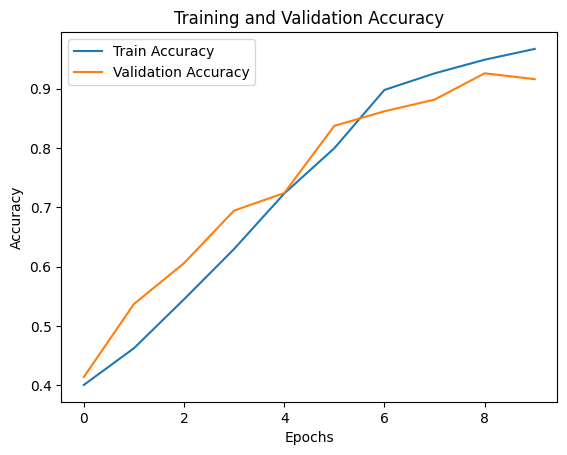

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Define ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale and validation split
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Set up train data generator
train_data = train_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/train',  # Path to your training dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Or 'binary' for binary classification
    subset='training'  # Use training subset
)

# Set up validation data generator (use the same directory and validation subset)
val_data = val_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/train',  # Same directory for both training and validation
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Or 'binary' for binary classification
    subset='validation'  # Use validation subset
)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


In [15]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


NameError: name 'plt' is not defined

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale and split validation

val_datagen = ImageDataGenerator(rescale=1./255)

# Set up train data generator
train_data = train_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
    subset='training'  # Specify that this is the training subset
)

# Set up validation data generator
val_data = val_datagen.flow_from_directory(
    '/kaggle/input/animal/Dataset/val',  # Typically same directory, but with a subset argument
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation data
)


Found 824 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4146 - loss: 1.7576

ValueError: Must provide at least one structure

In [20]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Specify the image file directly (path to the image file)
img_path = "/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png"

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

NameError: name 'predict_image' is not defined

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using the provided model.
    
    :param model: The trained model
    :param img_path: The path to the image to predict
    :param target_size: Target size for the image (height, width)
    :return: Predicted class index and confidence
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)
    
    return predicted_class, confidence


In [26]:
from tensorflow.keras.models import load_model

# Load your trained model (ensure the path is correct)
loaded_model = load_model("/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [25]:
from tensorflow.keras.models import load_model

# Load your trained model (ensure the path is correct)
loaded_model = load_model("/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

AttributeError: partially initialized module 'patsy' has no attribute 'highlevel' (most likely due to a circular import)

In [27]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Specify the image file directly (path to the image file)
img_path = "/kaggle/input/animal/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png"

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")


NameError: name 'loaded_model' is not defined

Mobile Net

In [2]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Directories for training, validation, and test data
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

# Data preprocessing for validation and test data (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",  # Use "categorical" if one-hot encoded labels
)

# Load validation data
val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",  # Use "categorical" if one-hot encoded labels
)

# Load test data
test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",  # Use "categorical" if one-hot encoded labels
)


Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)


<ipython-input-8-15b3ec1103f5>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

# Define class weights (example values, adjust based on dataset distribution)
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler (Reduce learning rate on plateau)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,  # Handle class imbalance during training
    callbacks=[lr_scheduler],    # Learning rate scheduler
)

# Fine-tune the model by unfreezing some layers of the base model
base_model.trainable = True
# Unfreeze the last 20 layers of the base model for fine-tuning
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Smaller learning rate for fine-tuning
    loss="sparse_categorical_crossentropy",  # Sparse loss for integer labels
    metrics=["accuracy"],
)

# Continue training with fine-tuning
fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fewer epochs for fine-tuning
    class_weight=class_weights,  # Keep class weights for fine-tuning
    callbacks=[lr_scheduler],    # Learning rate scheduler
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4651 - loss: 1.6176 - val_accuracy: 0.8307 - val_loss: 0.4404 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 528ms/step - accuracy: 0.7817 - loss: 0.5834 - val_accuracy: 0.7804 - val_loss: 0.4817 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 552ms/step - accuracy: 0.8121 - loss: 0.5290 - val_accuracy: 0.8677 - val_loss: 0.3500 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.8067 - loss: 0.5252 - val_accuracy: 0.9074 - val_loss: 0.3098 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 544ms/step - accuracy: 0.8725 - loss: 0.4198 - val_accuracy: 0.8571 - val_loss: 0.4108 - learning_rate: 0.0010
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 533ms/step - accuracy: 0.8695 - loss: 0.3762 - val_accuracy: 0.8915 - val_loss: 0.3256 - learning_rate: 0.0010
Epoch 7/10
30/33 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.8805 - loss: 0.3366
Epoch 7: R

In [12]:
# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 560ms/step - accuracy: 0.9506 - loss: 0.1631 - val_accuracy: 0.9259 - val_loss: 0.2336 - learning_rate: 1.0000e-04
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.9537 - loss: 0.1557 - val_accuracy: 0.9497 - val_loss: 0.1917 - learning_rate: 1.0000e-04
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 525ms/step - accuracy: 0.9731 - loss: 0.1009 - val_accuracy: 0.9656 - val_loss: 0.1312 - learning_rate: 1.0000e-04
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 522ms/step - accuracy: 0.9692 - loss: 0.0975 - val_accuracy: 0.9709 - val_loss: 0.1164 - learning_rate: 1.0000e-04
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 554ms/step - accuracy: 0.9621 - loss: 0.1589 - val_accuracy: 0.9762 - val_loss: 0.1230 - learning_rate: 1.0000e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 801ms/step - accuracy: 0.9827 - loss: 0.0838
Test Accuracy: 97.77%


In [13]:
# Save the model
model.save("animal_classification_mobilenetv2.h5")
print("Model saved as 'animal_classification_mobilenetv2.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_mobilenetv2.h5")
print("Model loaded successfully!")
loaded_model.summary()

Model saved as 'animal_classification_mobilenetv2.h5'
Model loaded successfully!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,341 (9.24 MB)

 Trainable params: 1,370,435 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

 Optimizer params: 2 (12.00 B)

Build Prediction Pipeline.

In [15]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Function to predict the class of a single image
def predict_image(model, img_path, target_size):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    
    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index
    confidence = np.max(predictions)  # Get the confidence (max probability)
    
    return predicted_class, confidence

# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: horse
Confidence: 100.00%


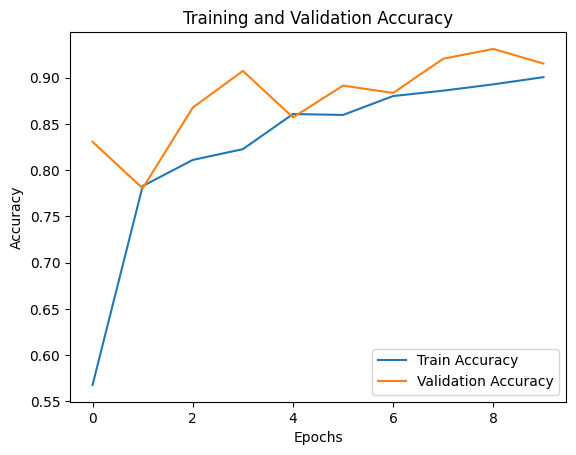

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 397ms/step - accuracy: 0.9719 - loss: 0.1175
Test Accuracy: 97.77%
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 541ms/step


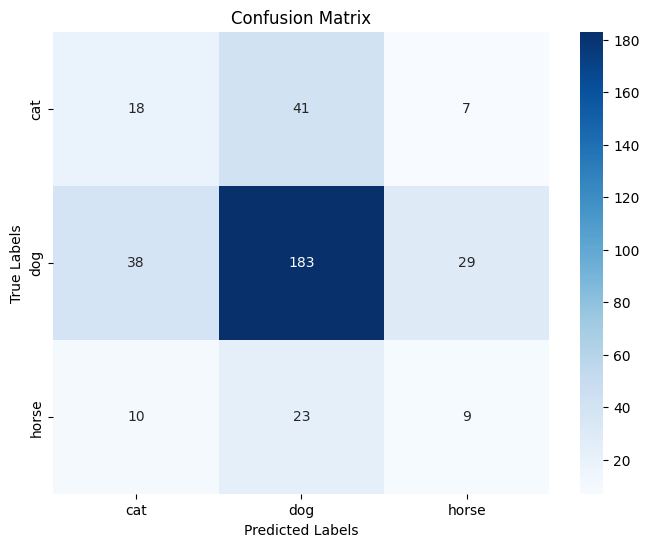

Classification Report:

              precision    recall  f1-score   support

         cat       0.27      0.27      0.27        66
         dog       0.74      0.73      0.74       250
       horse       0.20      0.21      0.21        42

    accuracy                           0.59       358
   macro avg       0.40      0.41      0.41       358
weighted avg       0.59      0.59      0.59       358

              precision    recall  f1-score     support
cat            0.272727  0.272727  0.272727   66.000000
dog            0.740891  0.732000  0.736419  250.000000
horse          0.200000  0.214286  0.206897   42.000000
accuracy       0.586592  0.586592  0.586592    0.586592
macro avg      0.404539  0.406338  0.405347  358.000000
weighted avg   0.591125  0.586592  0.588811  358.000000


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

VGG16

In [ ]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Default input size for VGG16
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load VGG16 pre-trained model
base_model = VGG16(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Freeze all but the last 4 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
# Save the model
model.save("animal_classification_vgg16.h5")
print("Model saved as 'animal_classification_vgg16.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_vgg16.h5")
print("Model loaded successfully!")
loaded_model.summary()

In [ ]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

In [ ]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

In [ ]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_path = "/kaggle/input/animal/Dataset/test/cat/animal-7089224_1280.jpg"  # Full path to the image file

# Make predictions
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)